# Standard node-classification using

Revision - 1.00, 16th October.2020

In [1]:
import torch
from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import DataLoader
from tensorboardX import SummaryWriter
import networkx as nx
import time
from datetime import datetime

# to visualize high dimensional data
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd


import os
import sys
sys.path.append(f"C:\\Users\\verma\\Desktop\\git\\anshul")

import GNN.torch.gcn_v1

Here a graph classification task on the IMDB-BINARY dataset, classification of movies (1000 movies).

In [2]:
writer = SummaryWriter("./log/" + datetime.now().strftime("%Y%m%d-%H%M%S"))

# stndard data-set for graph classification
dataset = TUDataset(root='/tmp/IMDB-BINARY', name='IMDB-BINARY')
dataset = dataset.shuffle()
task = 'graph'
# By default the version 1  mode has 3 layers and 200 epochs will change it to a class which can then be used
model = GNN.torch.gcn_v1.train(dataset, task, writer)

Epoch 0. Loss: 0.7065. Validation accuracy: 0.5600
Epoch 10. Loss: 0.6499. Validation accuracy: 0.5800
Epoch 20. Loss: 0.6093. Validation accuracy: 0.6000
Epoch 30. Loss: 0.6026. Validation accuracy: 0.6300
Epoch 40. Loss: 0.5928. Validation accuracy: 0.6100
Epoch 50. Loss: 0.6037. Validation accuracy: 0.6700
Epoch 60. Loss: 0.6104. Validation accuracy: 0.7200
Epoch 70. Loss: 0.6007. Validation accuracy: 0.7100
Epoch 80. Loss: 0.5833. Validation accuracy: 0.6700
Epoch 90. Loss: 0.5790. Validation accuracy: 0.6500
Epoch 100. Loss: 0.5672. Validation accuracy: 0.6200
Epoch 110. Loss: 0.5875. Validation accuracy: 0.7200
Epoch 120. Loss: 0.5801. Validation accuracy: 0.6800
Epoch 130. Loss: 0.5808. Validation accuracy: 0.6700
Epoch 140. Loss: 0.6091. Validation accuracy: 0.5800
Epoch 150. Loss: 0.6046. Validation accuracy: 0.5800
Epoch 160. Loss: 0.6018. Validation accuracy: 0.6000
Epoch 170. Loss: 0.6087. Validation accuracy: 0.6000
Epoch 180. Loss: 0.6094. Validation accuracy: 0.5800
Epoc

## Visualizing performance
(on entire dataset includes training points) --> will improve in new versions.

Accuracy of the model is 66.70%


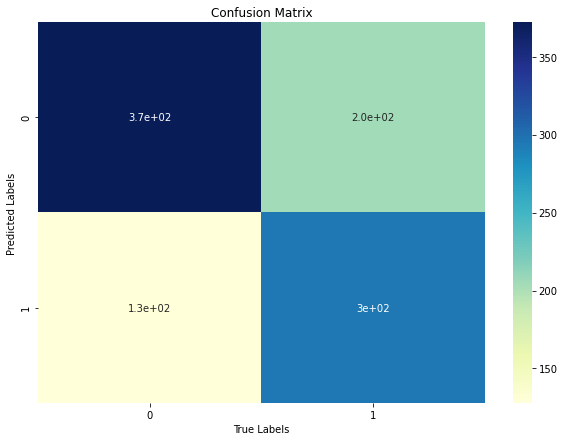

In [3]:
loader = DataLoader(dataset, batch_size=32, shuffle=True)
y_preds = []
y_trues = []
for batch in loader:
    emb, preds = model(batch)
    y_trues.append([y for y in batch.y.detach().numpy()])
    y_preds.append([np.argmax(pred, axis=0) for pred in preds.detach().numpy()])

y_trues = [j for sub in y_trues for j in sub]
y_preds = [j for sub in y_preds for j in sub]

y_trues = np.array(y_trues)
y_preds = np.array(y_preds)

#Plotting confusion matrix
classes = np.unique(y_trues)
cm = confusion_matrix(y_preds, y_trues)
df_cm = pd.DataFrame(cm, index = [i for i in classes],columns = [i for i in classes])
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix')


sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')


acc = (((y_trues == y_preds).astype(int).sum())/len(y_trues))*100

print('Accuracy of the model is %.2f%%' % (acc))

Not saving the best model at the moment will chnage in later versions.

In [4]:
#END